<a href="https://colab.research.google.com/github/aman5898/Data-Science-Extended-LRC/blob/main/scraping/ClassWork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install beautifulsoup4

In [4]:
from bs4 import BeautifulSoup
import requests as request

In [5]:
pageContent = request.get('https://www.worldometers.info/coronavirus/')
pageContent

<Response [200]>

b'\n<!DOCTYPE html>\n<!--[if IE 8]> <html lang="en" class="ie8"> <![endif]-->\n<!--[if IE 9]> <html lang="en" class="ie9"> <![endif]-->\n<!--[if !IE]><!-->\n<html lang="en">\n<!--<![endif]-->\n<head>\n<meta charset="utf-8">\n<meta http-equiv="X-UA-Compatible" content="IE=edge">\n<meta name="viewport" content="width=device-width, initial-scale=1">\n<title>COVID Live - Coronavirus Statistics - Worldometer</title>\n<meta name="description" content="Live statistics and coronavirus news tracking the number of confirmed cases, recovered patients, tests, and death toll due to the COVID-19 coronavirus from Wuhan, China. Coronavirus counter with new cases, deaths, and number of tests per 1 Million population. Historical data and info. Daily charts, graphs, news and updates">\n\n<link rel="shortcut icon" href="/favicon/favicon.ico" type="image/x-icon">\n<link rel="apple-touch-icon" sizes="57x57" href="/favicon/apple-icon-57x57.png">\n<link rel="apple-touch-icon" sizes="60x60" href="/favicon/appl
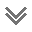

In [6]:
pageContent.content

In [11]:
soup = BeautifulSoup(pageContent.content, 'html.parser')

'<!DOCTYPE html>\n<!--[if IE 8]> <html lang="en" class="ie8"> <![endif]-->\n<!--[if IE 9]> <html lang="en" class="ie9"> <![endif]-->\n<!--[if !IE]><!-->\n<html lang="en">\n <!--<![endif]-->\n <head>\n  <meta charset="utf-8"/>\n  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>\n  <meta content="width=device-width, initial-scale=1" name="viewport"/>\n  <title>\n   COVID Live - Coronavirus Statistics - Worldometer\n  </title>\n  <meta content="Live statistics and coronavirus news tracking the number of confirmed cases, recovered patients, tests, and death toll due to the COVID-19 coronavirus from Wuhan, China. Coronavirus counter with new cases, deaths, and number of tests per 1 Million population. Historical data and info. Daily charts, graphs, news and updates" name="description"/>\n  <link href="/favicon/favicon.ico" rel="shortcut icon" type="image/x-icon"/>\n  <link href="/favicon/apple-icon-57x57.png" rel="apple-touch-icon" sizes="57x57"/>\n  <link href="/favicon/apple-icon-60
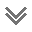

In [12]:
soup.prettify()

In [13]:
allcountValues =  soup.find_all('div', attrs={'class': 'maincounter-number'})
allcountValues

[<div class="maincounter-number">
 <span style="color:#aaa">281,914,362 </span>
 </div>, <div class="maincounter-number">
 <span>5,423,697</span>
 </div>, <div class="maincounter-number" style="color:#8ACA2B ">
 <span>251,310,130</span>
 </div>]

In [17]:
for x in allcountValues:
  print(x.get_text().strip() )

281,914,362
5,423,697
251,310,130


In [19]:
table = soup.table

In [49]:
header = table.tr
body = table.find_all('tbody')[0]

In [50]:
Headers = []

for x in header.find_all('th'):
  Headers.append(x.get_text().strip())

Headers

['#',
 'Country,Other',
 'TotalCases',
 'NewCases',
 'TotalDeaths',
 'NewDeaths',
 'TotalRecovered',
 'NewRecovered',
 'ActiveCases',
 'Serious,Critical',
 'Tot\xa0Cases/1M pop',
 'Deaths/1M pop',
 'TotalTests',
 'Tests/\n1M pop',
 'Population',
 'Continent',
 '1 Caseevery X ppl',
 '1 Deathevery X ppl',
 '1 Testevery X ppl',
 'New Cases/1M pop',
 'New Deaths/1M pop',
 'Active Cases/1M pop']

In [70]:
tableBody = []

for row in body.find_all('tr'):

    one_row = []
    for td in row.find_all('td'):
      one_row.append(td.get_text().strip())
    
    tableBody.append(one_row)

tableBody[0]

['',
 'Total:',
 '63,869,488',
 '+1,065',
 '1,237,077',
 '+44',
 '49,924,757',
 '+3,907',
 '12,707,654',
 '22,147',
 '',
 '',
 '',
 '',
 '',
 'North America',
 '',
 '',
 '',
 '',
 '',
 '']

In [ ]:
table.find_all('tbody')[0]

In [ ]:
import pandas as pd

df = pd.DataFrame(tableBody, columns = Headers)
df.head()

In [ ]:
df = df.iloc[8:]
df.head()

In [ ]:
df = df.reset_index().drop(['index', '#'], axis = 1)
df.info()

In [ ]:
df

In [44]:
pd.read_html('https://www.worldometers.info/coronavirus/')

HTTPError: ignored

In [38]:
url = 'https://en.wikipedia.org/wiki/The_World%27s_Billionaires'
df_list = pd.read_html(url)

In [42]:
df_list[2]

No.                      Name  ...    Nationality  Source(s) of wealth
0    1                Jeff Bezos  ...  United States               Amazon
1    2                 Elon Musk  ...  United States        Tesla, SpaceX
2    3  Bernard Arnault & family  ...         France                 LVMH
3    4                Bill Gates  ...  United States            Microsoft
4    5           Mark Zuckerberg  ...  United States       Meta Platforms
5    6            Warren Buffett  ...  United States   Berkshire Hathaway
6    7             Larry Ellison  ...  United States   Oracle Corporation
7    8                Larry Page  ...  United States        Alphabet Inc.
8    9               Sergey Brin  ...  United States        Alphabet Inc.
9   10             Mukesh Ambani  ...          India  Reliance Industries

[10 rows x 6 columns]